<a href="https://colab.research.google.com/github/nanabonsu92/Deep-Learning_TIES4911/blob/main/TIES4911_Task_2_3_(Bonsu_Afrane).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2-3**

Take Fashion-MNIST Classification example from the lecture materials and make a predictions of 5 input samples (on your chose) from the test set using simple “Single layer with 1 unit” and improved “Multiple layers” (with and without dropout) models. Use TensorBoard to detect possible overfitting. Visualize input images and show corresponding predicted categories (e.g. T-shirt, Trouser, Pullover, etc.)   

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.callbacks import TensorBoard
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

4422102/4422102 [==============================] - 0s 0us/step
1


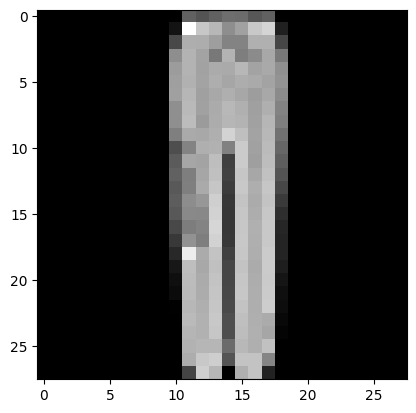

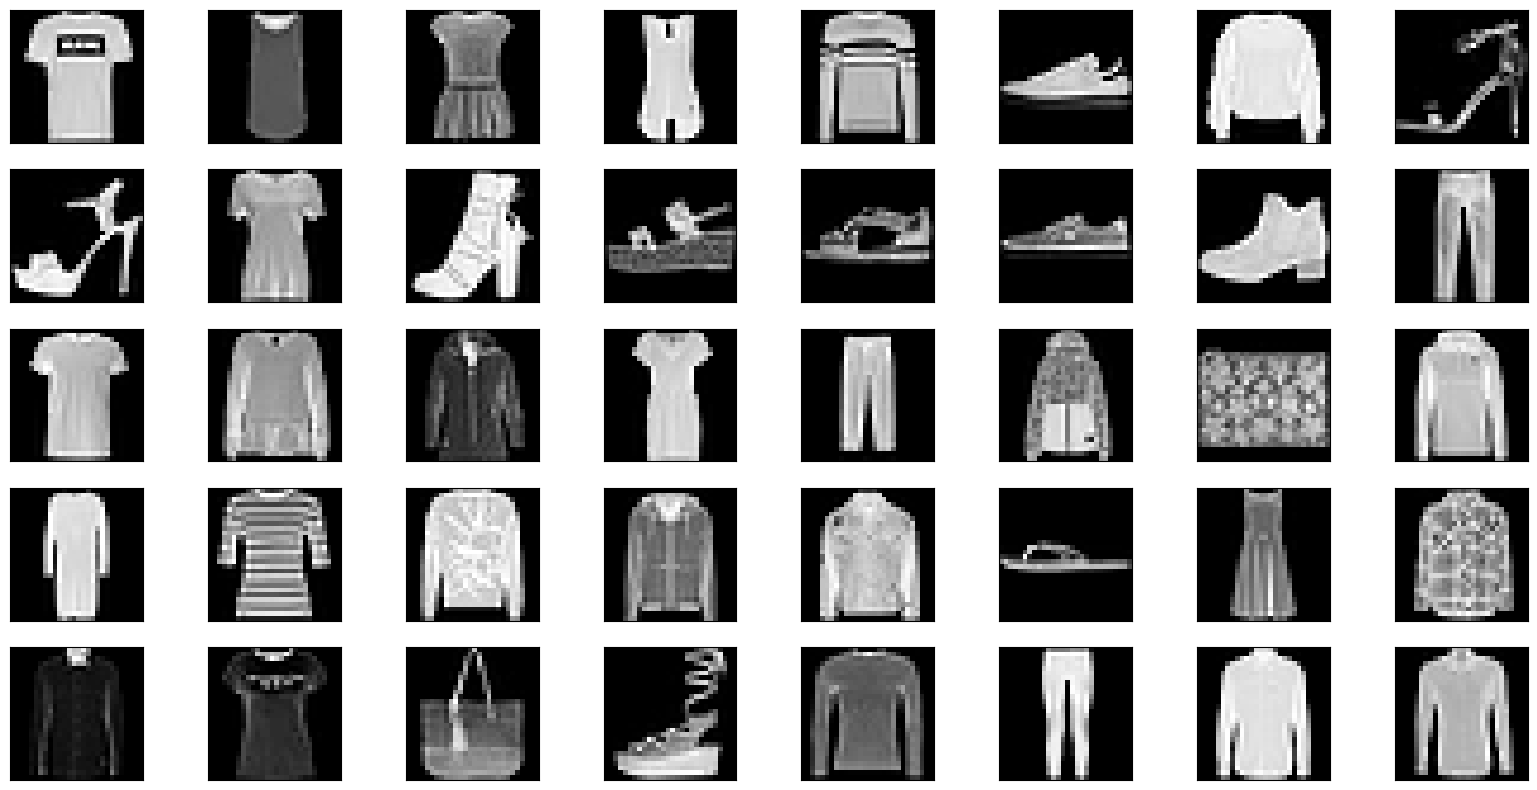

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# check some data
print (y_train[1000])
fig= plt.figure()
plt.imshow(x_train[1000], cmap='gray')
fig= plt.figure(figsize=(20,10))
for i in range (1,41):
  ax1 = fig.add_subplot(5,8,i)
  plt.xticks([], [])
  plt.yticks([], [])
  ax1.imshow(x_train[i], cmap='gray')

# normalizing the data to help with the training
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# prepare output dictionary
di = {0:'T-shirt',
      1:'Trouser',
      2:'Pullover',
      3:'Dress',
      4:'Coat',
      5:'Sandal',
      6:'Shirt',
      7:'Sneaker',
      8:'Bag',
      9:'Ankle boot'}

In [ ]:
# Function to train model
def train_model(model, model_name):
    tensorboard = TensorBoard(log_dir=f"logs/{model_name}")
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
              validation_data=(x_test, y_test), callbacks=[tensorboard])
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return model

In [ ]:
# Define and train the single layer model
model_single_layer = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(1, activation='relu', kernel_initializer='he_normal'),
    Dense(num_classes, activation='softmax')
])
model_single_layer.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_single_layer = train_model(model_single_layer, "single_layer")

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 2.0811 - accuracy: 0.1805 - val_loss: 1.9928 - val_accuracy: 0.1977
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 1.9371 - accuracy: 0.1976 - val_loss: 1.9094 - val_accuracy: 0.2086
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 1.8650 - accuracy: 0.2212 - val_loss: 1.8475 - val_accuracy: 0.2311
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8067 - accuracy: 0.2648 - val_loss: 1.7910 - val_accuracy: 0.2984
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 1.7385 - accuracy: 0.3227 - val_loss: 1.7226 - val_accuracy: 0.3198
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 1.6823 - accuracy: 0.3482 - val_loss: 1.6805 - val_accuracy: 0.3556
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 1.6465 - accuracy: 0.3549 - val_loss: 1.6513 - val_accuracy: 0.3542
Epoch 

In [ ]:
# Define and train the multiple layers model without dropout
model_without_dropout = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dense(num_classes, activation='softmax')
])
model_without_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_multi_layer = train_model(model_without_dropout, "multi_layer")

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.4786 - accuracy: 0.8286 - val_loss: 0.4445 - val_accuracy: 0.8344
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3493 - accuracy: 0.8725 - val_loss: 0.3790 - val_accuracy: 0.8646
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3100 - accuracy: 0.8849 - val_loss: 0.3910 - val_accuracy: 0.8648
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2910 - accuracy: 0.8928 - val_loss: 0.3343 - val_accuracy: 0.8780
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2730 - accuracy: 0.8978 - val_loss: 0.3442 - val_accuracy: 0.8753
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2577 - accuracy: 0.9049 - val_loss: 0.3326 - val_accuracy: 0.8810
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2419 - accuracy: 0.9082 - val_loss: 0.3170 - val_accuracy: 0.8862

In [ ]:
# Define and train the multiple layers model with dropout
model_with_dropout = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model_with_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_multi_layer_dropout = train_model(model_with_dropout, "multi_layer_dropout")

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.5193 - accuracy: 0.8127 - val_loss: 0.4544 - val_accuracy: 0.8389
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3832 - accuracy: 0.8596 - val_loss: 0.3937 - val_accuracy: 0.8547
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3498 - accuracy: 0.8712 - val_loss: 0.3637 - val_accuracy: 0.8680
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3274 - accuracy: 0.8777 - val_loss: 0.3682 - val_accuracy: 0.8675
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.3115 - accuracy: 0.8849 - val_loss: 0.3358 - val_accuracy: 0.8751
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2980 - accuracy: 0.8891 - val_loss: 0.3309 - val_accuracy: 0.8796
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2872 - accuracy: 0.8934 - val_loss: 0.3320 - val_accuracy: 0.8815

In [ ]:
# Function to make predictions and visualize
def make_predictions_and_visualize(model, model_name):
    # Select 5 random samples from the test set
    indices = np.random.choice(range(len(x_test)), 5)
    test_samples = x_test[indices]
    test_labels = y_test[indices]

    # Make predictions
    predictions = model.predict(test_samples)

    # Visualize the samples and predictions
    plt.figure(figsize=(10, 2))
    for i, (image, label) in enumerate(zip(test_samples, predictions)):
        plt.subplot(1, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{di[np.argmax(label)]}")
        plt.axis('off')
    plt.suptitle(f"Predictions with {model_name}\n", y=1.05)
    plt.show()

1/1 [==============================] - 0s 22ms/step


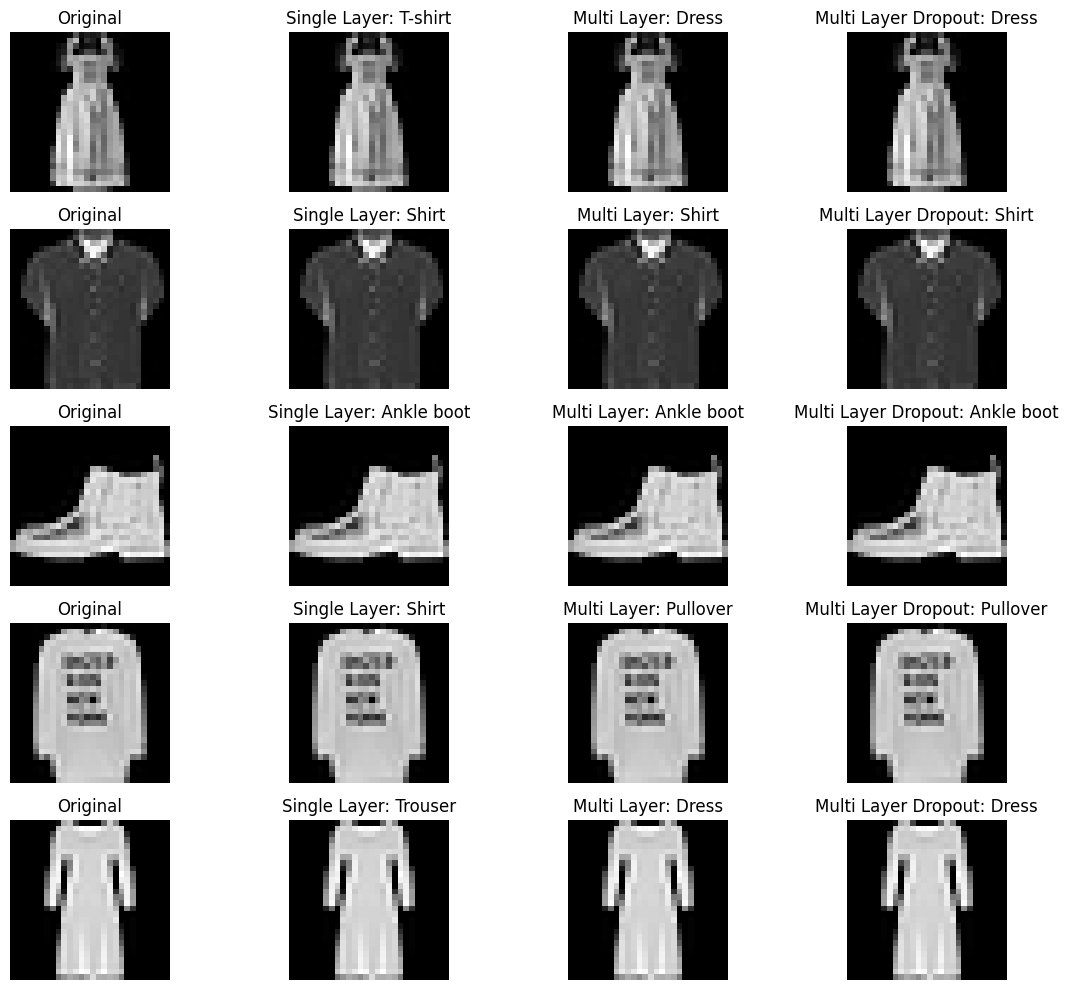

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize each original input image with its corresponding predicted image for each model
def make_predictions_and_visualize(models, model_names):
    # Select 5 random samples from the test set
    indices = np.random.choice(range(len(x_test)), 5)
    test_samples = x_test[indices]

    # Number of test samples
    num_samples = len(test_samples)

    # Set up the plot
    plt.figure(figsize=(12, 2 * num_samples))

    for i, image in enumerate(test_samples):
        # Display original image
        ax = plt.subplot(num_samples, 4, i * 4 + 1)
        plt.imshow(image, cmap='gray')
        plt.title("Original")
        plt.axis('off')

        for j, model in enumerate(models):
            # Make prediction
            prediction = model.predict(np.array([image]))
            predicted_label = di[np.argmax(prediction)]

            # Display predicted image
            ax = plt.subplot(num_samples, 4, i * 4 + j + 2)
            plt.imshow(image, cmap='gray')
            plt.title(f"{model_names[j]}: {predicted_label}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# List of models and their names
models = [model_single_layer, model_without_dropout, model_with_dropout]
model_names = ["Single Layer", "Multi Layer", "Multi Layer Dropout"]

# Visualize predictions
make_predictions_and_visualize(models, model_names)
